# Nithin S                           
# 221IT085

#                                   IT204 Lab Assignment 4

# Problem 1: Fourier Series Expansion 

$$
\begin{align*}
 \quad x(t) = \begin{cases}
3, & \text{if } 0 \leq t < 1 \\
-3, & \text{if } 1 \leq t < 2
\end{cases}
\end{align*}
$$


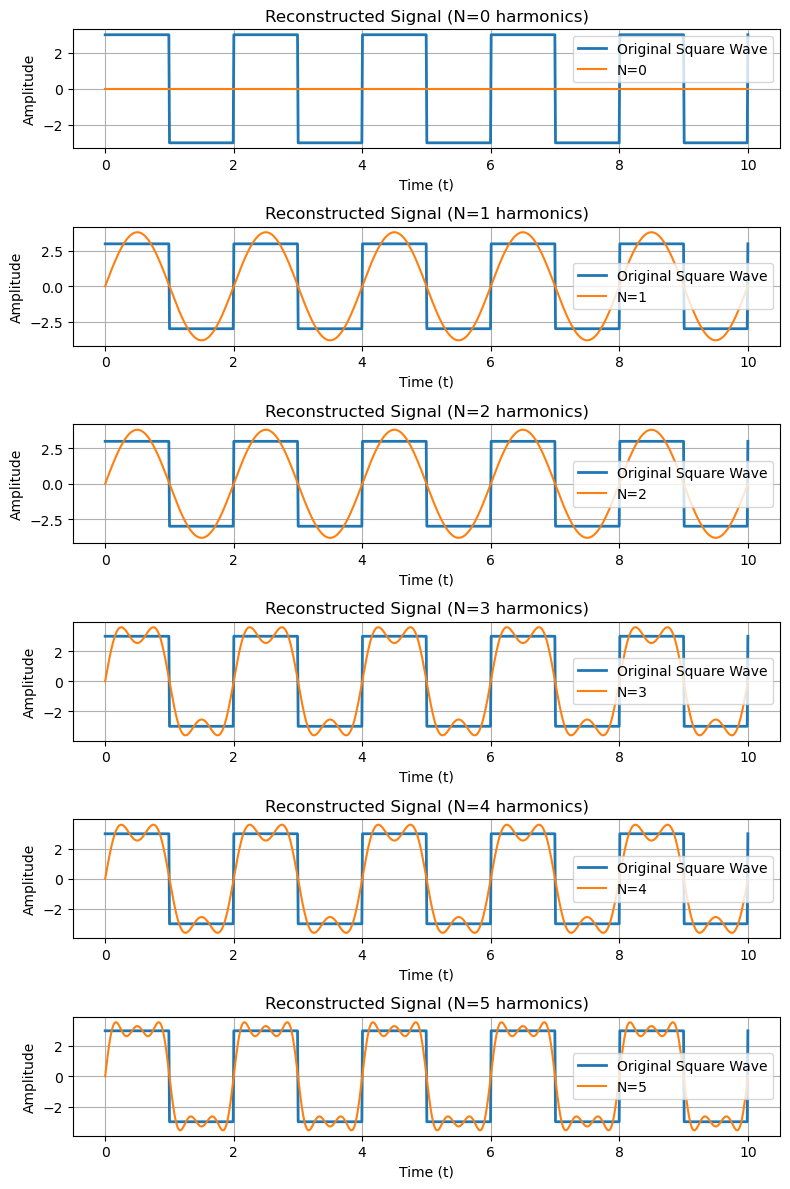

In [50]:
import numpy as np
import matplotlib.pyplot as plt

# Define the parameters of the square wave
A = 3  # Amplitude
T = 2  # Period
f0 = 1 / T  # Fundamental frequency

# Create a time vector covering multiple periods
t = np.linspace(0, 10, 1000)  # Time from 0 to 10 seconds

# Define the original square wave x(t)
x1 = np.piecewise(t, [(t % T) < 1, (t % T) >= 1], [A, -A])

# Create an empty list to store reconstructed signals
reconstructed_signals = []

# Define the number of harmonics to use
harmonics = [0, 1, 2, 3, 4, 5]

# Calculate and reconstruct the signals for each number of harmonics
for N in harmonics:
    # Initialize the reconstructed signal with zeros
    x_N = np.zeros_like(t)
    
    # Calculate the Fourier coefficients
    for n in range(1, N + 1):
        if n % 2 == 0:
            # Coefficients for even harmonics are 0 for a square wave
            continue
        X_n = (4 / (np.pi * n)) * np.sin(2 * np.pi * n * f0 * t)
        x_N += X_n
    
    # Scale the reconstructed signal to match the original amplitude
    x_N *= A
    
    # Append the reconstructed signal to the list
    reconstructed_signals.append(x_N)

# Plot the original square wave and reconstructed signals in a single column
plt.figure(figsize=(8, 12))

# Reconstructed signals
for i, N in enumerate(harmonics):
    plt.subplot(len(harmonics), 1, i + 1)
    plt.plot(t, x1, label='Original Square Wave', linewidth=2)
    plt.plot(t, reconstructed_signals[i], label=f'N={N}')
    plt.xlabel('Time (t)')
    plt.ylabel('Amplitude')
    plt.title(f'Reconstructed Signal (N={N} harmonics)')
    plt.grid(True)
    plt.legend()

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()


$$
x(t) = 3 + \sqrt{3} \cos(2t) + \sin(2t) + \sin(3t) - 0.5 \cos\left(5t + \frac{\pi}{3}\right)
$$

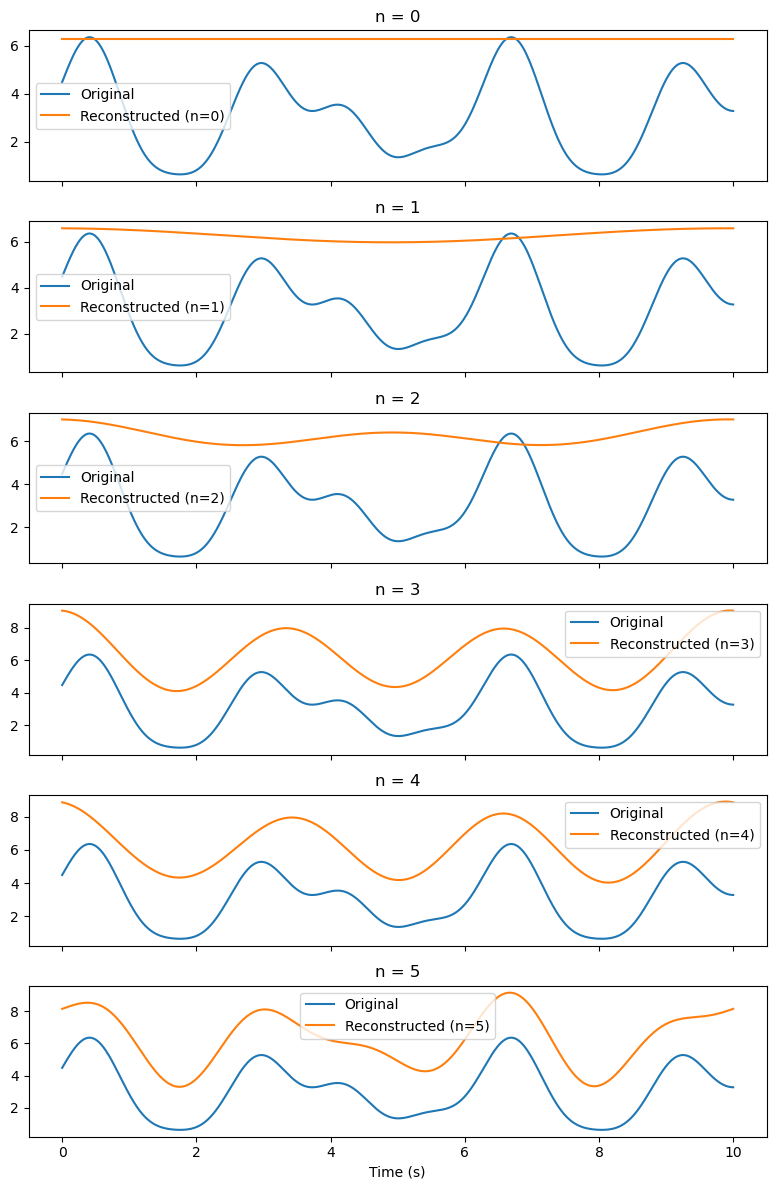

In [49]:
import numpy as np
import matplotlib.pyplot as plt

# Define the time range
t = np.linspace(0, 10, 1000)  # Time from 0 to 10 seconds

# Define the original signal x(t)
x_t = 3 + np.sqrt(3) * np.cos(2 * t) + np.sin(2 * t) + np.sin(3 * t) - 0.5 * np.cos(5 * t + np.pi/3)

# Function to calculate the Fourier series up to n harmonics
def fourier_series(t, n):
    result = np.zeros_like(t)  # Initialize the result array
    for k in range(n + 1):
        # Calculate the coefficients a_k and b_k for each harmonic
        a_k = 2 / 10 * np.trapz(x_t * np.cos(2 * np.pi * k * t / 10), t)
        b_k = 2 / 10 * np.trapz(x_t * np.sin(2 * np.pi * k * t / 10), t)
        result += a_k * np.cos(2 * np.pi * k * t / 10) + b_k * np.sin(2 * np.pi * k * t / 10)
    return result

# List of harmonics to consider
harmonics = [0, 1, 2, 3, 4, 5]

# Create subplots to compare the original and reconstructed signals
fig, axes = plt.subplots(len(harmonics), figsize=(8, 12), sharex=True)

for i, n in enumerate(harmonics):
    # Calculate the Fourier series up to n harmonics
    x_reconstructed = fourier_series(t, n)
    
    # Plot the original and reconstructed signals
    axes[i].plot(t, x_t, label='Original')
    axes[i].plot(t, x_reconstructed, label=f'Reconstructed (n={n})')
    axes[i].set_title(f'n = {n}')
    axes[i].legend()

plt.xlabel('Time (s)')
plt.tight_layout()
plt.show()


# Problem 2: Fourier Transform 

$$
x(t) = e^{-2t} \cdot u(t) \quad \text{where } u(t) \text{ is the unit step function}
$$


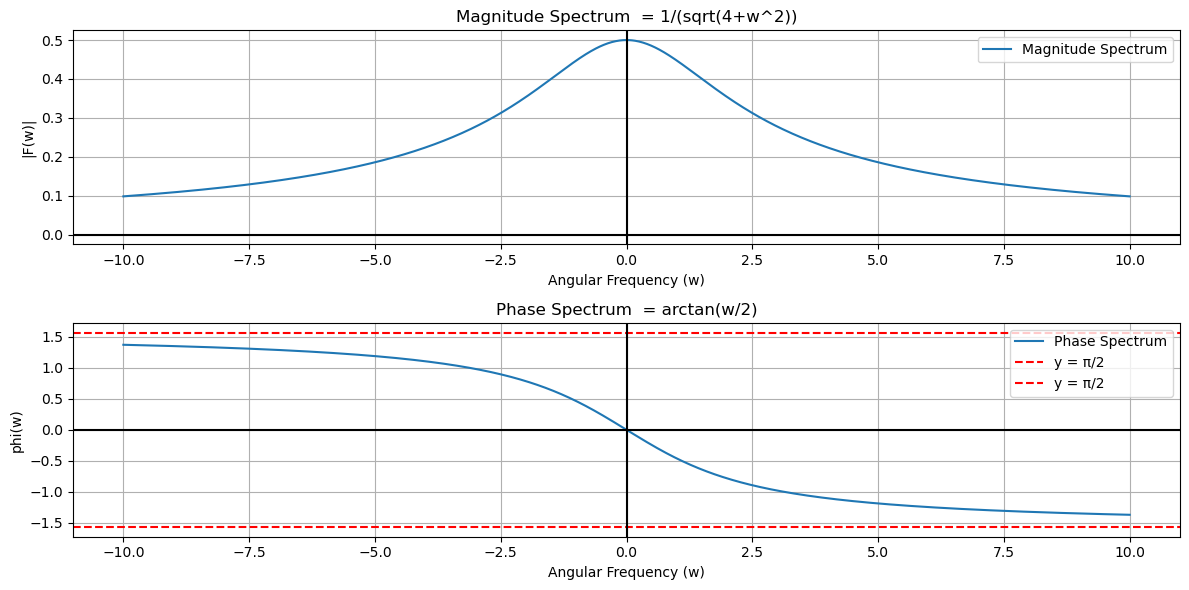

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Define the range of angular frequencies (w)
w = np.linspace(-10, 10, 1000)  # Adjust the range and number of points as needed

# Calculate the magnitude spectrum |F(w)|
magnitude_spectrum = 1 / np.sqrt(4 + w**2)

# Calculate the phase spectrum phi(w)
phase_spectrum = np.arctan(-w/2)

# Create subplots for magnitude and phase spectra
plt.figure(figsize=(12, 6))

# Magnitude Spectrum Plot
plt.subplot(2, 1, 1)
plt.plot(w, magnitude_spectrum, label='Magnitude Spectrum')
plt.axvline(0,color='black')
plt.axhline(0,color='black')
plt.xlabel('Angular Frequency (w)')
plt.ylabel('|F(w)|')
plt.title('Magnitude Spectrum  = 1/(sqrt(4+w^2))')
plt.grid(True)
plt.legend()

# Phase Spectrum Plot
plt.subplot(2, 1, 2)
plt.plot(w, phase_spectrum, label='Phase Spectrum')
plt.axhline(np.pi / 2, color='red', linestyle='--', label='y = π/2')
plt.axhline(-np.pi / 2, color='red', linestyle='--', label='y = π/2')
plt.axvline(0,color='black')
plt.axhline(0,color='black')
plt.xlabel('Angular Frequency (w)')
plt.ylabel('phi(w)')
plt.title('Phase Spectrum  = arctan(w/2)')
plt.grid(True)
plt.legend()

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()
